In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train_data.csv')
test  = pd.read_csv('test_data.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#View variable datatypes
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Check for NULL values counts
NULL = pd.DataFrame(train.isnull().sum()).reset_index()
NULL.head()

,index,0
0,Loan_ID,0
1,Gender,13
2,Married,3
3,Dependents,15
4,Education,0


<BarContainer object of 13 artists>

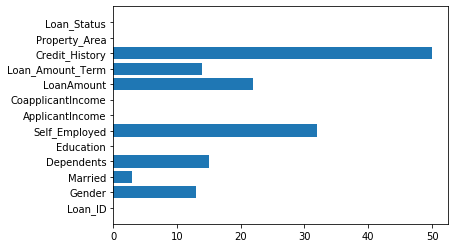

In [7]:
plt.barh(NULL['index'],NULL[0])

Y    422
N    192
Name: Loan_Status, dtype: int64


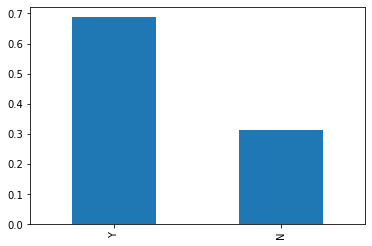

In [8]:
# Univariate Analysis
print(train['Loan_Status'].value_counts())
(train['Loan_Status'].value_counts(normalize =True)).plot.bar()

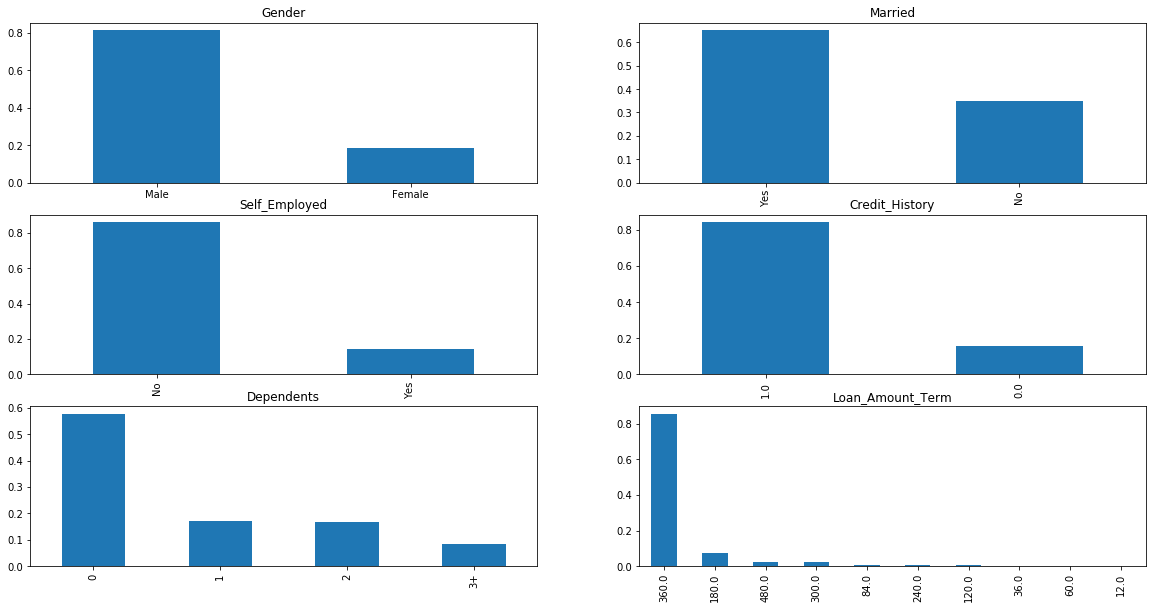

In [9]:
plt.figure(1,figsize=(21,10)) 
plt.subplot(321) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.xticks(rotation=0)
plt.subplot(322)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(323)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(324)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.subplot(325)
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents') 
plt.subplot(326)
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')
plt.show()

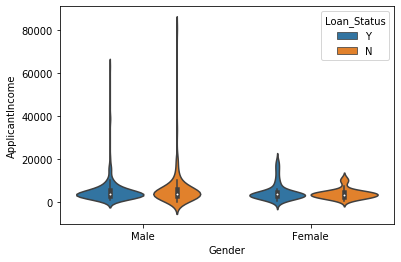

In [10]:
sns.violinplot(x='Gender',y='ApplicantIncome',data= train,hue='Loan_Status')

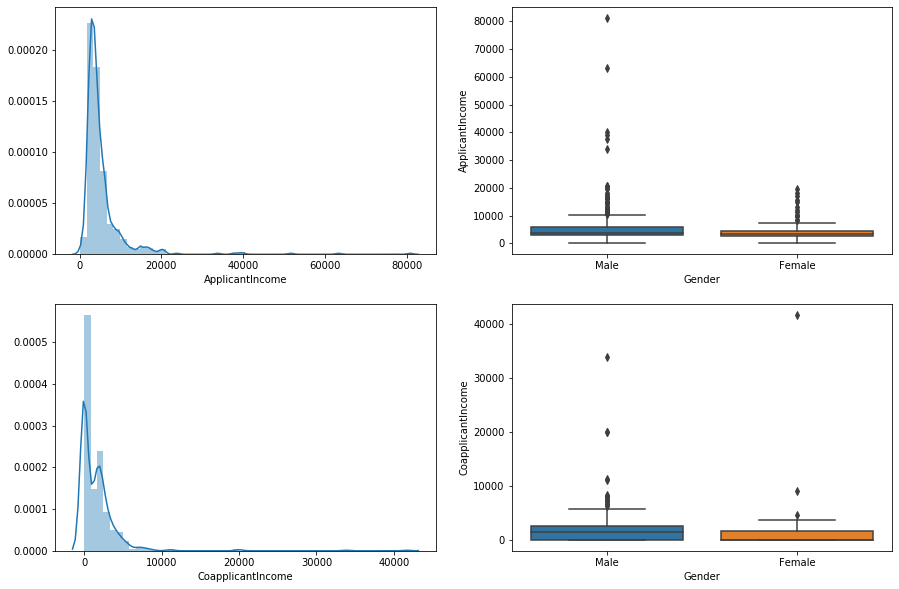

In [11]:
plt.figure(1,figsize=(15,10))
plt.subplot(221)
sns.distplot(train['ApplicantIncome'])
plt.subplot(222)
sns.boxplot(x='Gender',y='ApplicantIncome',data= train)
plt.subplot(223)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(224)
sns.boxplot(x='Gender',y='CoapplicantIncome',data= train)
plt.show()



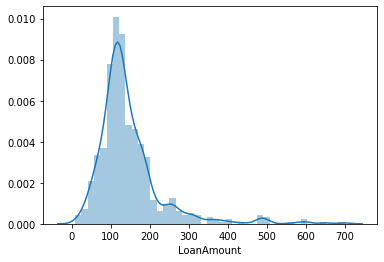

In [12]:
sns.distplot(train['LoanAmount'])

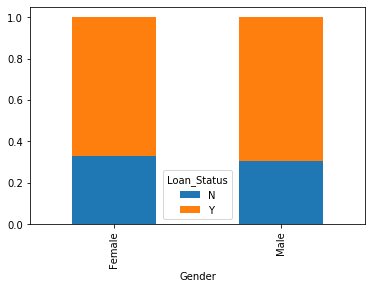

In [13]:
bi_gender= pd.crosstab(train['Gender'],train['Loan_Status'])
bi_gender.div(bi_gender.sum(1),axis=0).plot.bar(stacked=True)

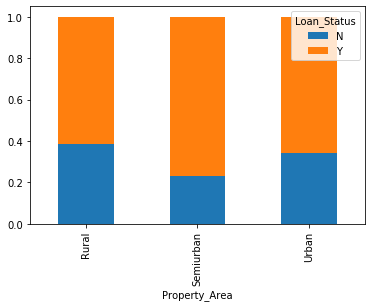

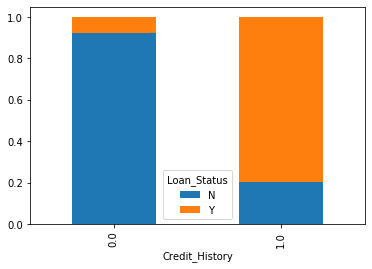

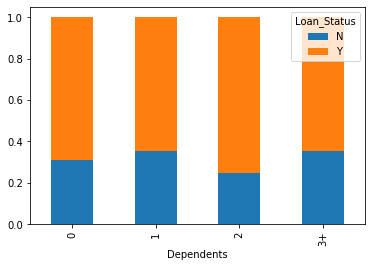

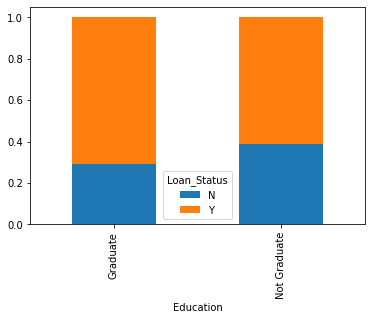

In [20]:

bi_loc= pd.crosstab(train['Property_Area'],train['Loan_Status'])
bi_loc.div(bi_loc.sum(1),axis=0).plot.bar(stacked=True)


bi_ch= pd.crosstab(train['Credit_History'],train['Loan_Status'])
bi_ch.div(bi_ch.sum(1),axis=0).plot.bar(stacked=True)


bi_dep= pd.crosstab(train['Dependents'],train['Loan_Status'])
bi_dep.div(bi_dep.sum(1),axis=0).plot.bar(stacked=True)


bi_edu= pd.crosstab(train['Education'],train['Loan_Status'])
bi_edu.div(bi_edu.sum(1),axis=0).plot.bar(stacked=True)



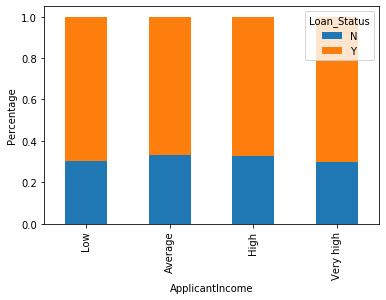

In [22]:
bins=[0,4000,8000,12000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

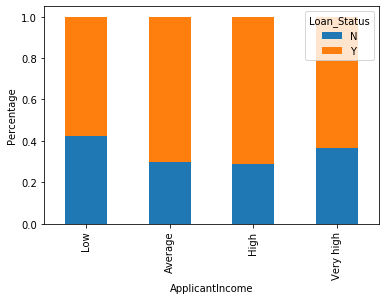

In [26]:
bins=[0,3000,8000,12000,81000] 
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
group=['Low','Average','High', 'Very high'] 
train['TotalIncome_bin']=pd.cut(train['TotalIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['TotalIncome_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')